📌 Step 1: Download Pre-Trained GloVe Embeddings


In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-03-16 20:07:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-16 20:07:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-16 20:07:53--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

📌 Step 2: Load GloVe Embeddings into Dictionary


In [6]:
import numpy as np

glove_path = "glove.6B.50d.txt"  # Using 50-dimensional embeddings for faster computation
word_embeddings = {}  # Dictionary to store word vectors

# Read the GloVe file and store word vectors
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # First value is the word
        vector = np.asarray(values[1:], dtype="float32")  # Rest are vector values
        word_embeddings[word] = vector  # Store in dictionary

print(f"✅ Loaded {len(word_embeddings)} word vectors.")

✅ Loaded 400000 word vectors.


📌 Step 3: Define Function to Find Similar Words


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_words(base_word, top_n=5):
    """
    Finds the most similar words to a given word using cosine similarity.
    :param base_word: The word to find similar words for.
    :param top_n: The number of similar words to retrieve.
    :return: List of top_n most similar words.
    """
    if base_word not in word_embeddings:
        print(f"❌ Word '{base_word}' not found in GloVe vocabulary.")
        return []

    base_vector = word_embeddings[base_word].reshape(1, -1)  # Reshape for similarity calculation
    similarities = {}

    # Compute cosine similarity with all words
    for word, vector in word_embeddings.items():
        sim = cosine_similarity(base_vector, vector.reshape(1, -1))
        similarities[word] = sim[0][0]

    # Sort words by similarity score (excluding the input word itself)
    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    similar_words = [word for word, _ in sorted_words if word != base_word][:top_n]

    return similar_words

# Test similarity function
test_word = "king"
similar_words = find_similar_words(test_word, top_n=5)
print(f"👑 Words most similar to '{test_word}': {similar_words}")


👑 Words most similar to 'king': ['prince', 'queen', 'ii', 'emperor', 'son']


📌 Step 4: Visualize Word Embeddings with t-SNE


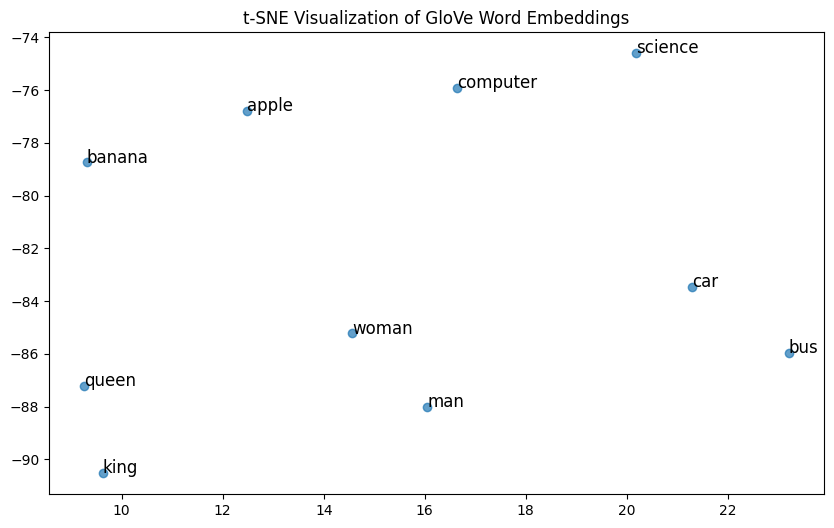

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_glove(words_to_plot):
    """
    Visualizes word embeddings in 2D space using t-SNE.
    :param words_to_plot: List of words to visualize.
    """
    vectors = np.array([word_embeddings[word] for word in words_to_plot if word in word_embeddings])

    # Reduce dimensions from 50D to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_vectors = tsne.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    # Annotate points
    for i, word in enumerate(words_to_plot):
        if word in word_embeddings:
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

    plt.title("t-SNE Visualization of GloVe Word Embeddings")
    plt.show()

# Select words to plot
words_to_visualize = ["king", "queen", "man", "woman", "apple", "banana", "car", "bus", "computer", "science"]
visualize_glove(words_to_visualize)